Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import calendar

## Importing the datasets

In [2]:
walmart=pd.read_csv(r'C:\Users\dagas\OneDrive\Desktop\DATA\WalmartData\train.csv')
walmart_feature=pd.read_csv(r'C:\Users\dagas\OneDrive\Desktop\DATA\WalmartData\features.csv')
walmart_stores=pd.read_csv(r'C:\Users\dagas\OneDrive\Desktop\DATA\WalmartData\stores.csv')

Walmart dataset that includes StoreID, DepartmentID, Weekly Sales for every week

In [3]:
walmart.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [4]:
walmart.shape

(421570, 5)

Store Type and their Size

In [5]:
walmart_stores.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [6]:
walmart_feature.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

Grouping the data by Store and Dept and then adding the weekly sales.

In [7]:
walmartgroup=walmart.groupby(['Store','Date'])[['Weekly_Sales']].sum()
walmartgroup.reset_index(inplace=True)
walmartgroup.head()

Store        Date  Weekly_Sales
0      1  2010-02-05    1643690.90
1      1  2010-02-12    1641957.44
2      1  2010-02-19    1611968.17
3      1  2010-02-26    1409727.59
4      1  2010-03-05    1554806.68

Merging the the "walmart_stores" and "walmart_group" dataset. Then merge the resulting dataset with "walmart_feature" dataset.

In [8]:
result=pd.merge(walmartgroup, walmart_stores, how='inner', on='Store', left_on=None, right_on=None,
        left_index=False, right_index=False, sort=False,
        suffixes=('_x', '_y'), copy=True, indicator=False)
data=pd.merge(result,walmart_feature, how='inner', on=['Store','Date'],left_on=None, right_on=None,
        left_index=False, right_index=False, sort=False,
        suffixes=('_x', '_y'), copy=True, indicator=False)
data.head()

Store        Date  Weekly_Sales Type    Size  Temperature  Fuel_Price  \
0      1  2010-02-05    1643690.90    A  151315        42.31       2.572   
1      1  2010-02-12    1641957.44    A  151315        38.51       2.548   
2      1  2010-02-19    1611968.17    A  151315        39.93       2.514   
3      1  2010-02-26    1409727.59    A  151315        46.63       2.561   
4      1  2010-03-05    1554806.68    A  151315        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment  IsHoliday  
0         8.106      False  
1         8.106       True  
2         8.106      False  
3         8.106      False  
4         8.106      False

In [9]:
data.shape

(6435, 15)

We will now try to convert the isHoliday column to 1 and 0 for ease in model building.

In [10]:
data['IsHoliday']=data.IsHoliday.apply(lambda x:1 if x==True else 0)
data.head()

Store        Date  Weekly_Sales Type    Size  Temperature  Fuel_Price  \
0      1  2010-02-05    1643690.90    A  151315        42.31       2.572   
1      1  2010-02-12    1641957.44    A  151315        38.51       2.548   
2      1  2010-02-19    1611968.17    A  151315        39.93       2.514   
3      1  2010-02-26    1409727.59    A  151315        46.63       2.561   
4      1  2010-03-05    1554806.68    A  151315        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment  IsHoliday  
0         8.106          0  
1         8.106          1  
2         8.106          0  
3         8.106          0  
4         8.106          0

In [11]:
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday         int64
dtype: object

We will now create more columns by splitting date into Day, month, Year, Month

In [12]:
data['Date']=pd.to_datetime(data['Date'])
data['Day']=data.Date.dt.day
data['Month']=data.Date.dt.month
data['Year']=data.Date.dt.year
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])
data.head()

Store       Date  Weekly_Sales Type    Size  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90    A  151315        42.31       2.572   
1      1 2010-02-12    1641957.44    A  151315        38.51       2.548   
2      1 2010-02-19    1611968.17    A  151315        39.93       2.514   
3      1 2010-02-26    1409727.59    A  151315        46.63       2.561   
4      1 2010-03-05    1554806.68    A  151315        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment  IsHoliday  Day Month  Year  
0         8.106          0    5   Feb  2010  
1         8.106          1   12   Feb  2010  
2         8.106          0   19   Feb  2010  
3         8.106          0   26   Feb  2010  
4         8.106          0    5   Mar  2010

We have to convert the month into string value, because the model will consider months superior if they are givenn numerical value.

In [13]:
data.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                int64
Day                      int64
Month                   object
Year                     int64
dtype: object

In [14]:
data.isnull().sum()

Store              0
Date               0
Weekly_Sales       0
Type               0
Size               0
Temperature        0
Fuel_Price         0
MarkDown1       4155
MarkDown2       4798
MarkDown3       4389
MarkDown4       4470
MarkDown5       4140
CPI                0
Unemployment       0
IsHoliday          0
Day                0
Month              0
Year               0
dtype: int64

In [15]:
data.head()

Store       Date  Weekly_Sales Type    Size  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90    A  151315        42.31       2.572   
1      1 2010-02-12    1641957.44    A  151315        38.51       2.548   
2      1 2010-02-19    1611968.17    A  151315        39.93       2.514   
3      1 2010-02-26    1409727.59    A  151315        46.63       2.561   
4      1 2010-03-05    1554806.68    A  151315        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment  IsHoliday  Day Month  Year  
0         8.106          0    5   Feb  2010  
1         8.106          1   12   Feb  2010  
2         8.106          0   19   Feb  2010  
3         8.106          0   26   Feb  2010  
4         8.106          0    5   Mar  2010

In [16]:
data['Week']=data.Date.dt.isocalendar().week
data.head()

Store       Date  Weekly_Sales Type    Size  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90    A  151315        42.31       2.572   
1      1 2010-02-12    1641957.44    A  151315        38.51       2.548   
2      1 2010-02-19    1611968.17    A  151315        39.93       2.514   
3      1 2010-02-26    1409727.59    A  151315        46.63       2.561   
4      1 2010-03-05    1554806.68    A  151315        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment  IsHoliday  Day Month  Year  Week  
0         8.106          0    5   Feb  2010     5  
1         8.106          1   12   Feb  2010     6  
2         8.106          0   19   Feb  2010     7  
3         8.106          0   26   Feb  2010     8  
4         8.106          0    5   Mar  2010     9

In [17]:
dfweeks=data.groupby('Week').sum()

dfweeks.head()

C:\Users\dagas\AppData\Local\Temp\ipykernel_4496\1198846578.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfweeks=data.groupby('Week').sum()


Store  Weekly_Sales      Size  Temperature  Fuel_Price   MarkDown1  \
Week                                                                       
1      2070  8.773121e+07  11725884      3438.27     287.489   214551.50   
2      2070  8.269676e+07  11725884      3167.09     291.404   148560.51   
3      2070  8.273564e+07  11725884      3476.88     293.341   104001.81   
4      2070  7.943483e+07  11725884      3455.57     294.581    63331.86   
5      3105  1.419895e+08  17588826      4919.52     418.696  1624211.71   

      MarkDown2  MarkDown3   MarkDown4  MarkDown5           CPI  Unemployment  \
Week                                                                            
1     956964.10    5105.11    44069.57  223036.75  15421.135275       710.979   
2     420168.49    3172.06    22332.89  165721.27  15430.151991       710.979   
3     141268.63    3098.39    27717.05  122143.56  15443.190027       710.979   
4      74200.84    3089.75     4254.13  116290.60  15456.228061       710.979   
5     126542.47    6408.63  1286593.08  267767.25  23017.155918      1098.848   

      IsHoliday   Day    Year  
Week                           
1             0   585  181035  
2             0  1215  181035  
3             0  1845  181035  
4             0  2475  181035  
5             0   540  271485

In [18]:
import plotly.express as px
fig=px.line(data_frame=dfweeks, x=dfweeks.index, y='Weekly_Sales',labels={'Weekly_Sales':'Weekly Sales','x':'Weeks'})
fig.update_traces(line_color='red',line_width=3)

In [19]:
import plotly.graph_objs as go
fig=go.Figure()
fig.add_trace(go.Scatter(x=dfweeks.index, y=dfweeks.MarkDown1, name='Markdown1', mode='lines'))
fig.add_trace(go.Scatter(x=dfweeks.index, y=dfweeks.MarkDown2, name='Markdown2', mode='lines'))
fig.add_trace(go.Scatter(x=dfweeks.index, y=dfweeks.MarkDown3, name='Markdown3', mode='lines'))
fig.add_trace(go.Scatter(x=dfweeks.index, y=dfweeks.MarkDown4, name='Markdown4', mode='lines'))
fig.add_trace(go.Scatter(x=dfweeks.index, y=dfweeks.MarkDown5, name='Markdown5', mode='lines'))
fig.update_layout(title='Sales VS Markdown')

In [20]:
data['MarkDown1'].fillna(-500,inplace=True)
data['MarkDown2'].fillna(-500,inplace=True)
data['MarkDown3'].fillna(-500,inplace=True)
data['MarkDown4'].fillna(-500,inplace=True)
data['MarkDown5'].fillna(-500,inplace=True)

In [21]:
import plotly.graph_objs as go
fig=go.Figure()
fig.add_trace(go.Scatter(x=dfweeks.index, y=dfweeks.MarkDown1, name='Markdown1', mode='lines'))
fig.add_trace(go.Scatter(x=dfweeks.index, y=dfweeks.MarkDown2, name='Markdown2', mode='lines'))
fig.add_trace(go.Scatter(x=dfweeks.index, y=dfweeks.MarkDown3, name='Markdown3', mode='lines'))
fig.add_trace(go.Scatter(x=dfweeks.index, y=dfweeks.MarkDown4, name='Markdown4', mode='lines'))
fig.add_trace(go.Scatter(x=dfweeks.index, y=dfweeks.MarkDown5, name='Markdown5', mode='lines'))
fig.update_layout(title='Sales VS Markdown')

C:\Users\dagas\AppData\Local\Temp\ipykernel_4496\3971157405.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




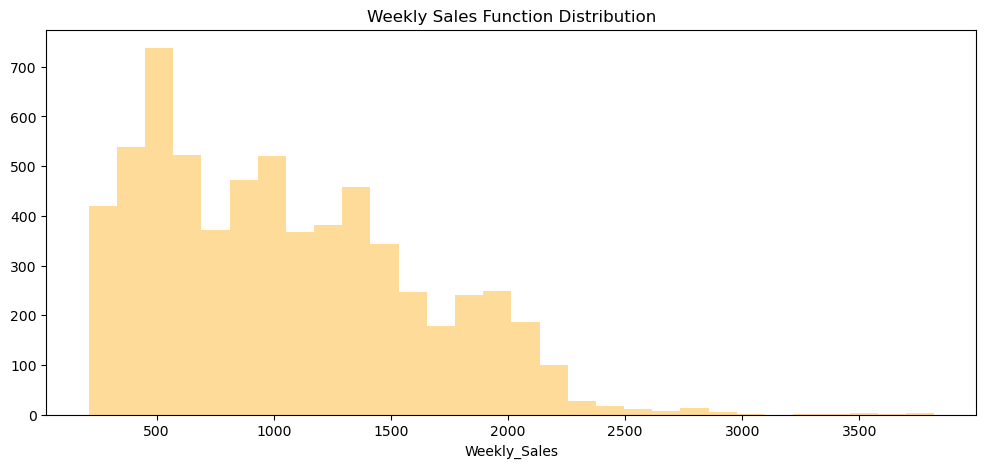

In [22]:
data['Weekly_Sales']=data['Weekly_Sales']/1000
plt.figure(figsize=(12,5))
sns.distplot(data['Weekly_Sales'],bins=30,kde=False,color='orange')
plt.title('Weekly Sales Function Distribution')
plt.show()

In [23]:
def weekly_sales(column):
    plt.figure()
    plt.scatter(data[column],data['Weekly_Sales'])
    plt.title('Weekly Sales')
    plt.show()

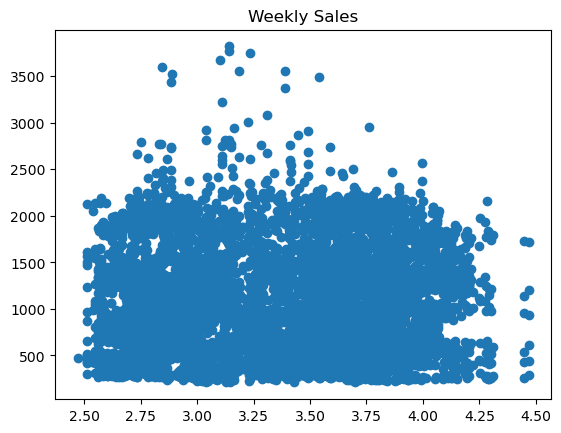

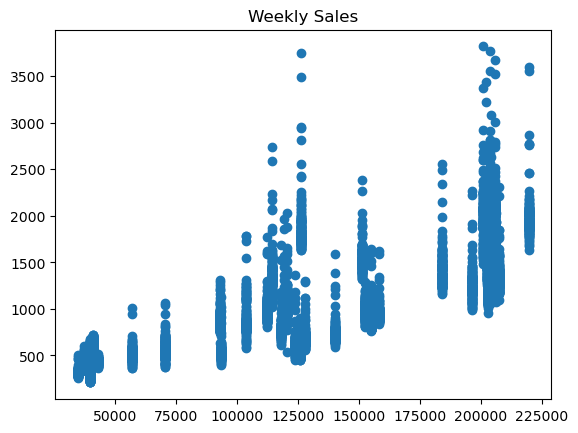

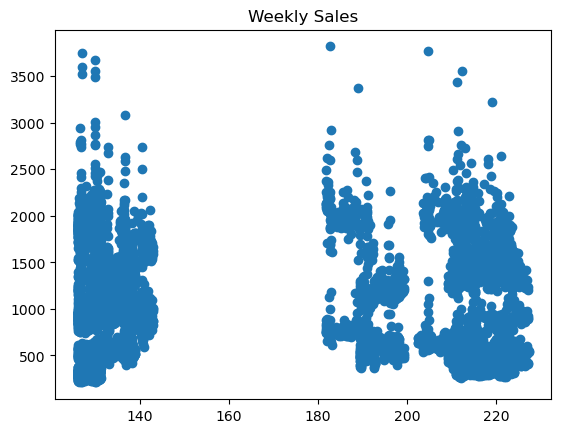

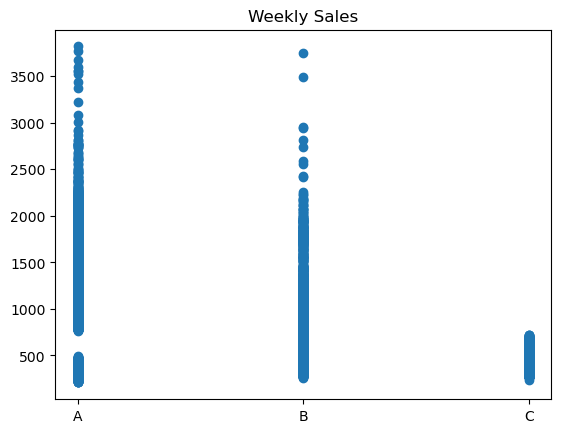

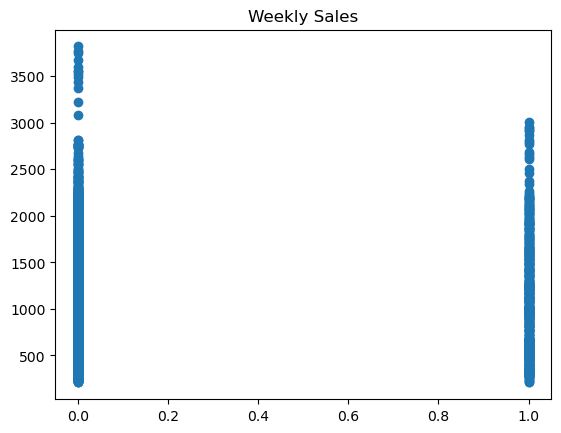

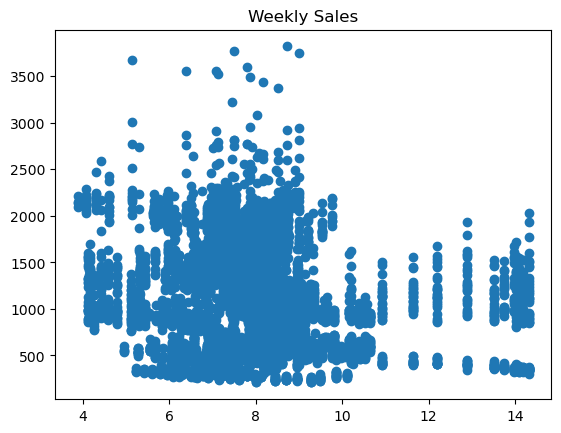

In [24]:
lis=['Fuel_Price','Size','CPI','Type','IsHoliday','Unemployment']
for a in lis:
    weekly_sales(a)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

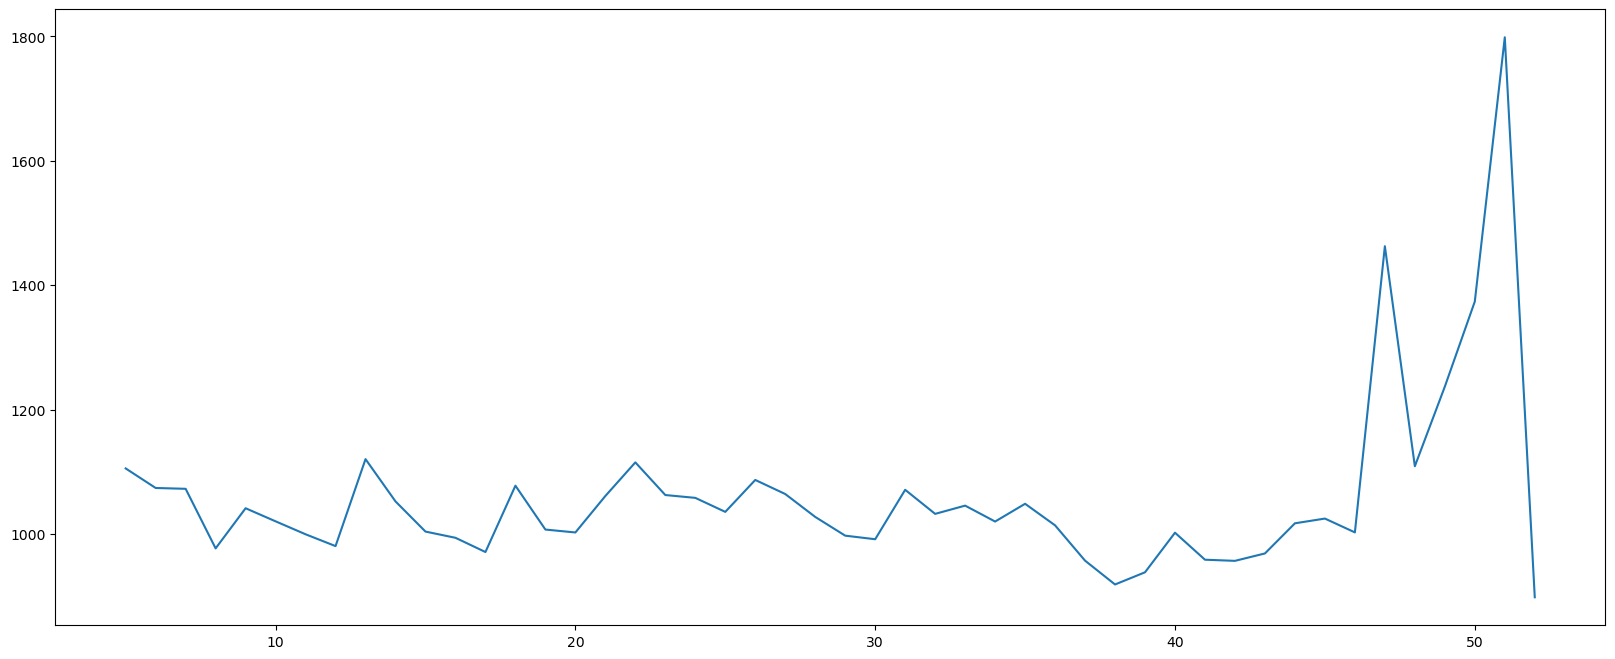

In [25]:
weekly2010=data[data['Year']==2010]['Weekly_Sales'].groupby(data['Week']).mean()
weekly2011=data[data['Year']==2011]['Weekly_Sales'].groupby(data['Week']).mean()
weekly2012=data[data['Year']==2012]['Weekly_Sales'].groupby(data['Week']).mean()
plt.figure(figsize=(20,8))
sns.lineplot(x=weekly2010.index,y=weekly2010.values)
sns.lineplot(x=weekly2011.index,y=weekly2011.values)
sns.lineplot(x=weekly2012.index,y=weekly2012.values)
plt.show()

[]

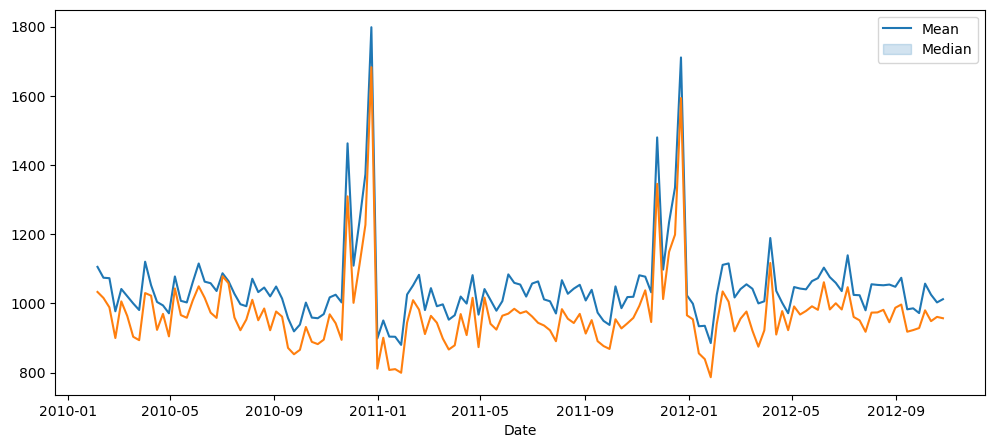

In [26]:
weeklysalesmean=data['Weekly_Sales'].groupby(data['Date']).mean()
weeklysalesmedian=data['Weekly_Sales'].groupby(data['Date']).median()
plt.figure(figsize=(12,5))
sns.lineplot(x=weeklysalesmean.index,y=weeklysalesmean.values)
sns.lineplot(x=weeklysalesmedian.index,y=weeklysalesmedian.values)
plt.legend(['Mean','Median'])
plt.plot()

In [27]:
data1=pd.read_csv(r'C:\Users\dagas\OneDrive\Desktop\DATA\train.csv')
data1.set_index('Date',inplace=True)
data1.head()

Store  Dept  Weekly_Sales  IsHoliday
Date                                            
2010-02-05      1     1      24924.50      False
2010-02-12      1     1      46039.49       True
2010-02-19      1     1      41595.55      False
2010-02-26      1     1      19403.54      False
2010-03-05      1     1      21827.90      False

In [28]:
store4=data1[data1['Store']==4]
sales4=pd.DataFrame(store4.Weekly_Sales.groupby(store4.index).sum())
sales4.reset_index(inplace=True)
sales4['Date']=pd.to_datetime(sales4['Date'])
sales4.set_index('Date',inplace=True)

In [29]:
sales4

Weekly_Sales
Date                    
2010-02-05    2135143.87
2010-02-12    2188307.39
2010-02-19    2049860.26
2010-02-26    1925728.84
2010-03-05    1971057.44
...                  ...
2012-09-28    2027620.23
2012-10-05    2209835.43
2012-10-12    2133026.07
2012-10-19    2097266.85
2012-10-26    2149594.46

[143 rows x 1 columns]

In [30]:
data1.head()

Store  Dept  Weekly_Sales  IsHoliday
Date                                            
2010-02-05      1     1      24924.50      False
2010-02-12      1     1      46039.49       True
2010-02-19      1     1      41595.55      False
2010-02-26      1     1      19403.54      False
2010-03-05      1     1      21827.90      False

In [31]:
store6=data1[data1['Store']==6]
sales6=pd.DataFrame(store6.Weekly_Sales.groupby(store6.index).sum())
sales6.reset_index(inplace=True)
sales6['Date']=pd.to_datetime(sales6['Date'])
sales6.set_index('Date', inplace=True)

In [32]:
sales6

Weekly_Sales
Date                    
2010-02-05    1652635.10
2010-02-12    1606283.86
2010-02-19    1567138.07
2010-02-26    1432953.21
2010-03-05    1601348.82
...                  ...
2012-09-28    1369131.46
2012-10-05    1518177.71
2012-10-12    1459396.84
2012-10-19    1436883.99
2012-10-26    1431426.34

[143 rows x 1 columns]

In [33]:
#additve decomposition

<Figure size 640x480 with 0 Axes>

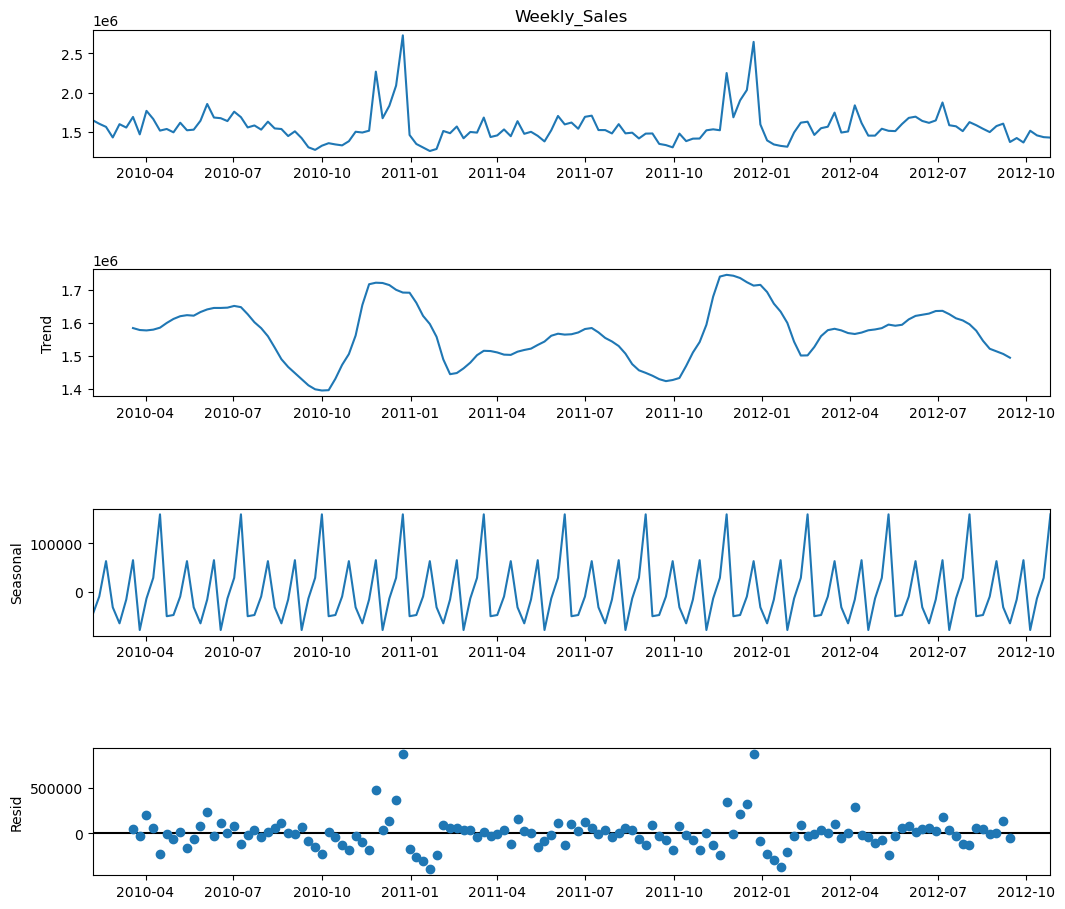

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(sales6['Weekly_Sales'], period=12)
fig=plt.figure()
fig=decomposition.plot()
fig.set_size_inches(12,10)
plt.show()

In [35]:
#multiplicative decomposition

<Figure size 640x480 with 0 Axes>

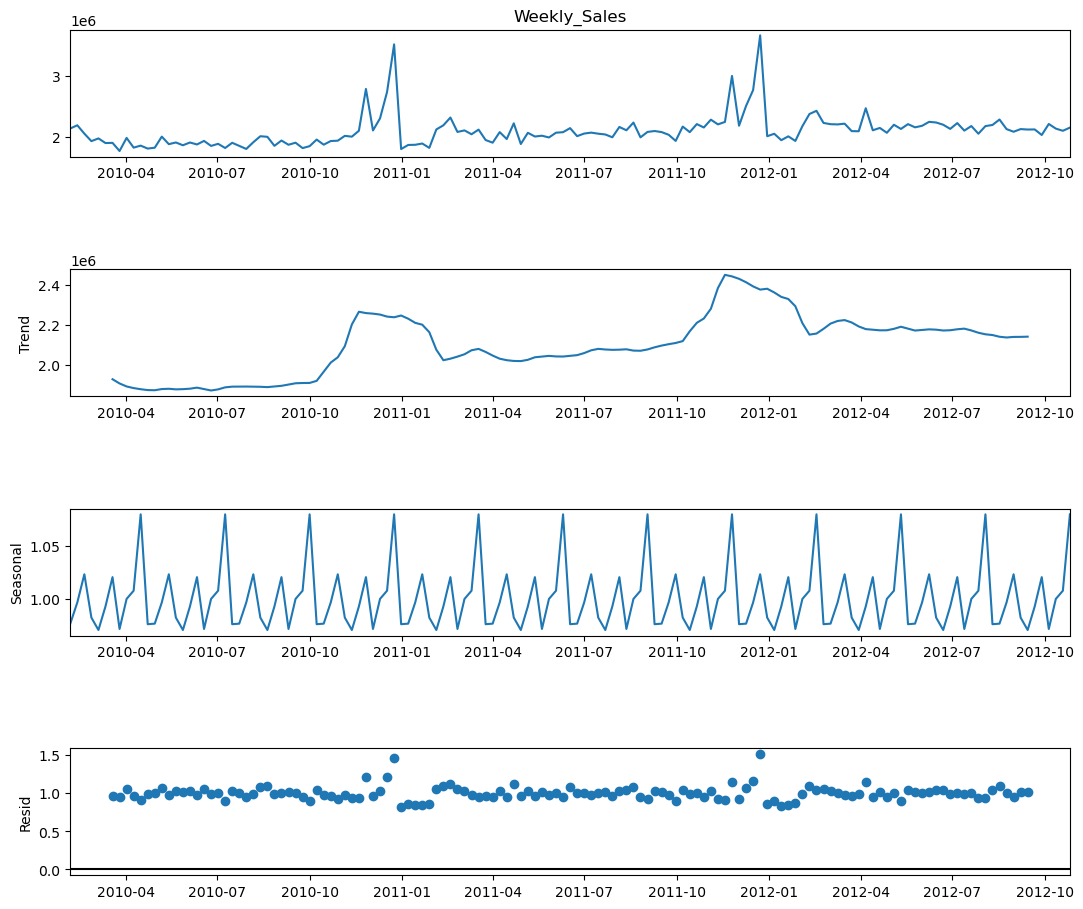

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(sales4.Weekly_Sales, model='multiplicative', period=12)
fig=plt.figure()
fig=decomposition.plot()
fig.set_size_inches(12,10)
plt.show()

In [37]:
y1=sales4.Weekly_Sales
y2=sales6.Weekly_Sales

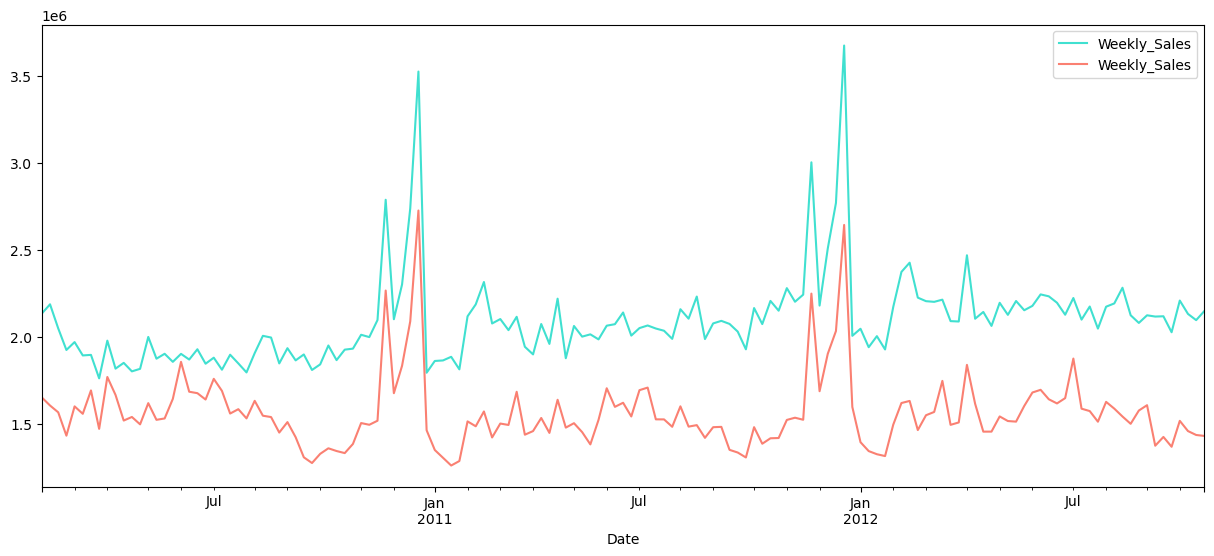

In [38]:
y1.plot(figsize=(15,6),color='turquoise',legend=True)
y2.plot(figsize=(15,6),color='salmon',legend=True)
plt.show()

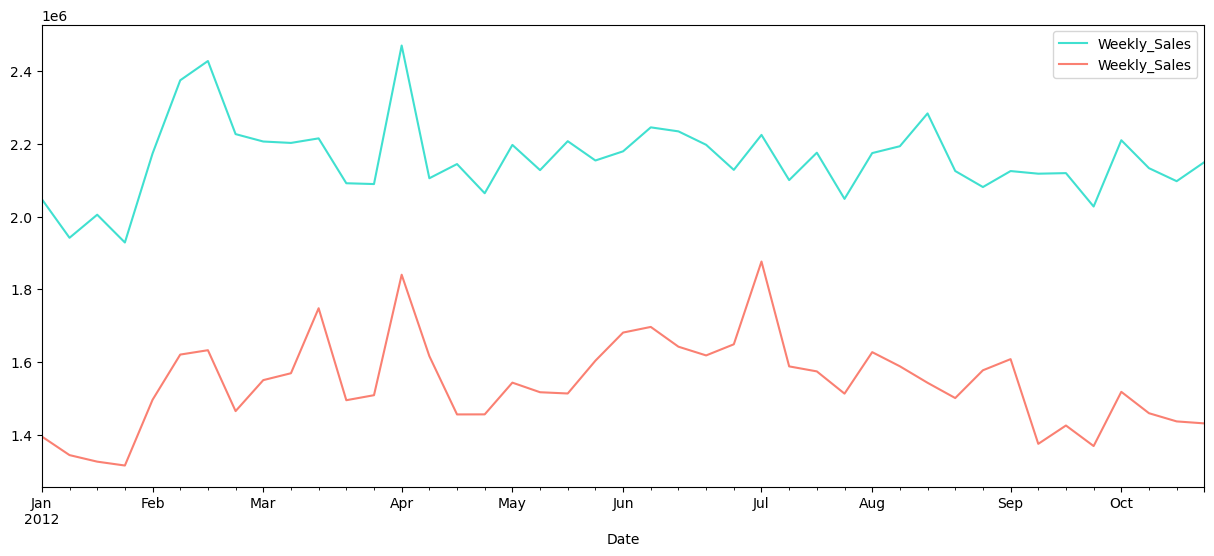

In [39]:
y1['2012'].plot(figsize=(15,6),color='turquoise',legend=True)
y2['2012'].plot(figsize=(15,6),color='salmon',legend=True)
plt.show()

In [40]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],52) for x in list(itertools.product(p,d,q))]

In [41]:
import statsmodels.api as sm
mod= sm.tsa.statespace.SARIMAX(y1,order=(4,4,3), seasonal_order=(1,1,0,52),enforce_invertibility=False)
results=mod.fit()
print(results.summary().tables[1])

C:\Users\dagas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

C:\Users\dagas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.

C:\Users\dagas\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7438      0.540     -3.230      0.001      -2.802      -0.686
ar.L2         -1.2798      0.579     -2.212      0.027      -2.414      -0.146
ar.L3         -0.5915      0.247     -2.391      0.017      -1.076      -0.107
ar.L4         -0.1894      0.091     -2.082      0.037      -0.368      -0.011
ma.L1         -1.3828      0.488     -2.832      0.005      -2.340      -0.426
ma.L2         -0.2139      1.052     -0.203      0.839      -2.276       1.848
ma.L3          0.6007      0.589      1.020      0.308      -0.553       1.755
ar.S.L52      -0.0667      0.049     -1.374      0.169      -0.162       0.028
sigma2      1.622e+10   5.44e-11   2.98e+20      0.000    1.62e+10    1.62e+10


C:\Users\dagas\AppData\Local\Temp\ipykernel_4496\1450309030.py:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



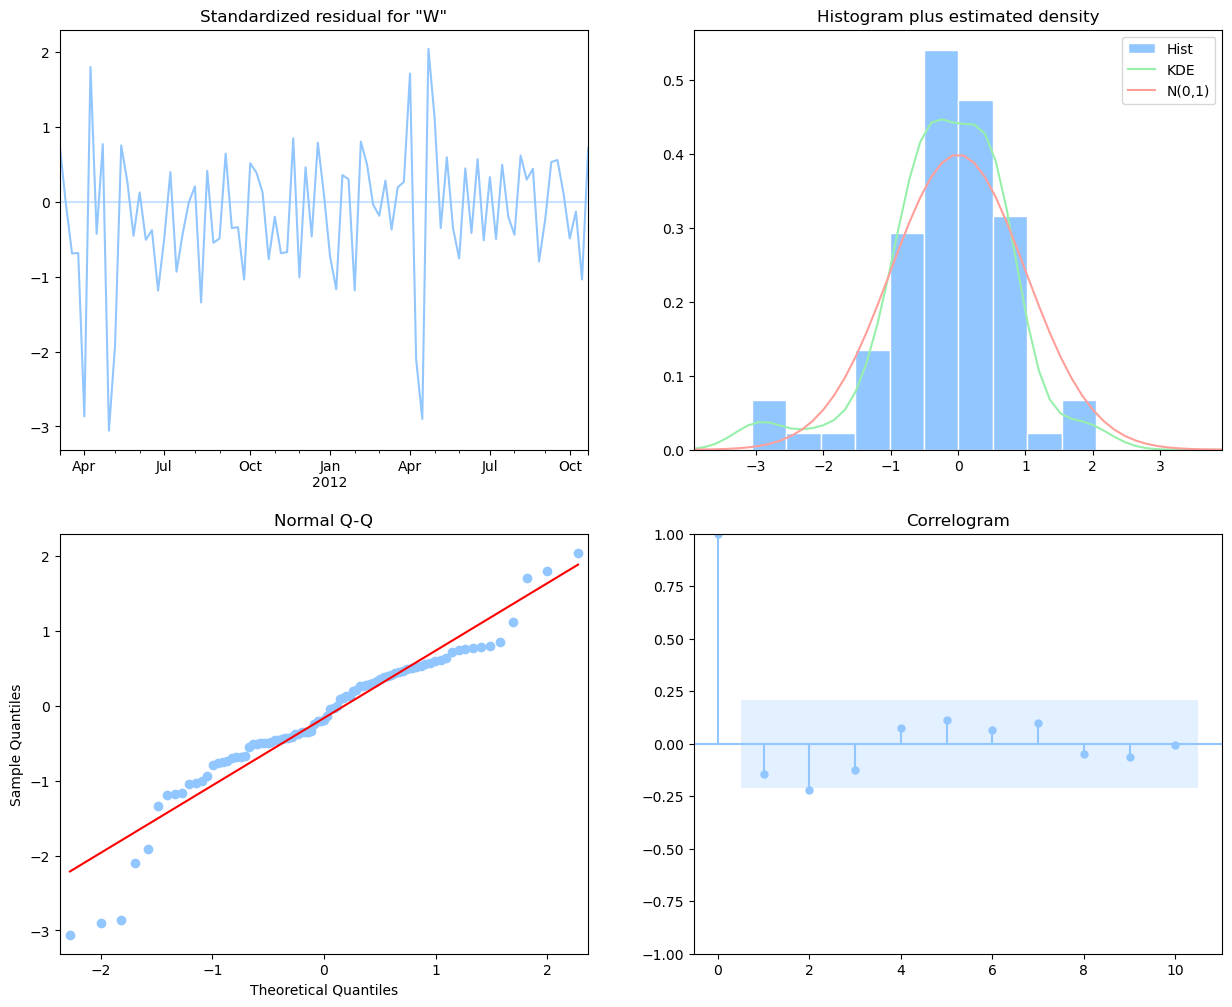

In [42]:
plt.style.use('seaborn-pastel')
results.plot_diagnostics(figsize=(15,12))
plt.show()

In [43]:
pred=results.get_prediction(start=pd.to_datetime('2012-07-27'),dynamic=False)
pred_ci=pred.conf_int()

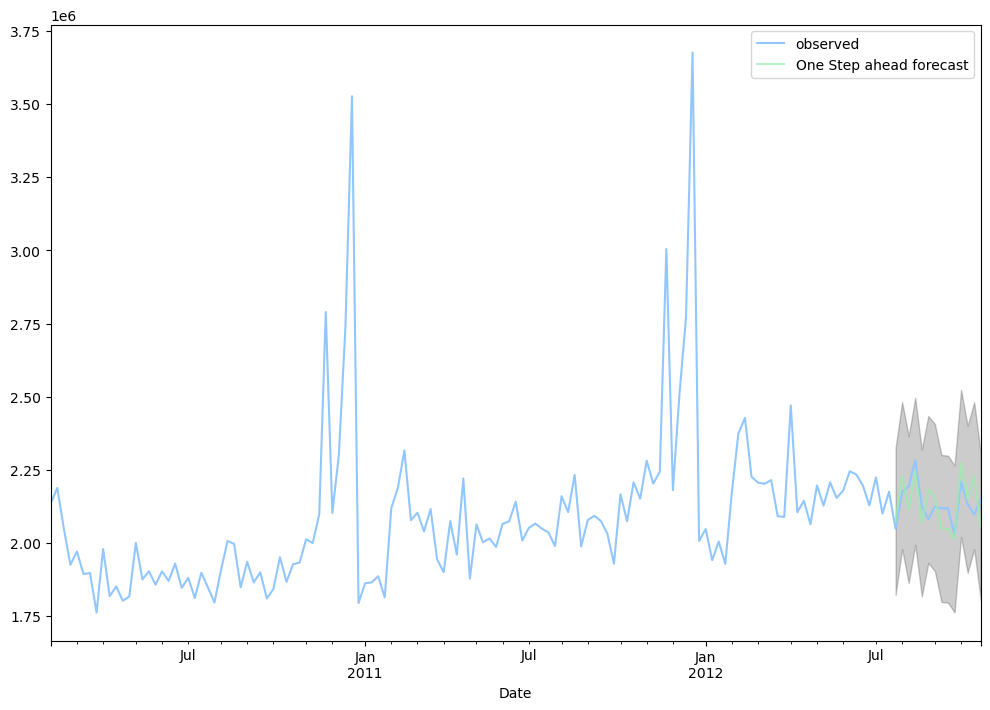

In [44]:
ax=y1['2010':].plot(label='observed', figsize=(12,8))
pred.predicted_mean.plot(ax=ax,label='One Step ahead forecast', alpha=.7)
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0],pred_ci.iloc[:,1], color='k',alpha=0.2)
plt.legend()
plt.show()

In [45]:
pred_ci.iloc[:,0]

2012-07-27    1.822788e+06
2012-08-03    1.979457e+06
2012-08-10    1.862681e+06
2012-08-17    1.994120e+06
2012-08-24    1.817357e+06
2012-08-31    1.931929e+06
2012-09-07    1.904349e+06
2012-09-14    1.798205e+06
2012-09-21    1.796369e+06
2012-09-28    1.762756e+06
2012-10-05    2.021266e+06
2012-10-12    1.898254e+06
2012-10-19    1.978827e+06
2012-10-26    1.805910e+06
Freq: W-FRI, Name: lower Weekly_Sales, dtype: float64

In [46]:
sales6=pd.DataFrame(store6.Weekly_Sales.groupby(store6.index).sum())
sales6

Weekly_Sales
Date                    
2010-02-05    1652635.10
2010-02-12    1606283.86
2010-02-19    1567138.07
2010-02-26    1432953.21
2010-03-05    1601348.82
...                  ...
2012-09-28    1369131.46
2012-10-05    1518177.71
2012-10-12    1459396.84
2012-10-19    1436883.99
2012-10-26    1431426.34

[143 rows x 1 columns]

In [47]:
pred.conf_int()

lower Weekly_Sales  upper Weekly_Sales
2012-07-27        1.822788e+06        2.325303e+06
2012-08-03        1.979457e+06        2.481964e+06
2012-08-10        1.862681e+06        2.365183e+06
2012-08-17        1.994120e+06        2.496619e+06
2012-08-24        1.817357e+06        2.319855e+06
2012-08-31        1.931929e+06        2.434426e+06
2012-09-07        1.904349e+06        2.406847e+06
2012-09-14        1.798205e+06        2.300702e+06
2012-09-21        1.796369e+06        2.298865e+06
2012-09-28        1.762756e+06        2.265250e+06
2012-10-05        2.021266e+06        2.523756e+06
2012-10-12        1.898254e+06        2.400739e+06
2012-10-19        1.978827e+06        2.481304e+06
2012-10-26        1.805910e+06        2.308377e+06

In [48]:
y_forecasted=pred.predicted_mean
y_actual=y1['2012-7-27':]

In [49]:
mse=((y_forecasted-y_actual)**2).mean()
print("The mean squared error of our forecast is {}".format(round(mse,2)))

The mean squared error of our forecast is 4751223847.66


In [50]:
pred_dynamic=results.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic= True, full_results=True)
pred_dynamic_ci= pred_dynamic.conf_int()

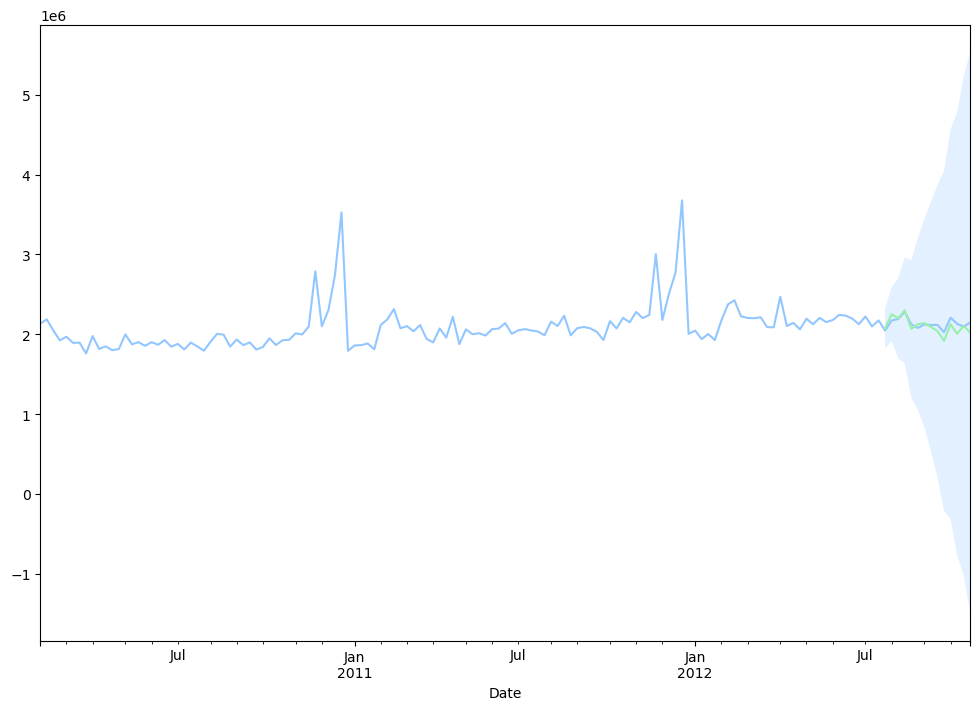

In [51]:
ax=y1['2010':].plot(label='observed', figsize=(12,8))
pred_dynamic.predicted_mean.plot(label='dynamic', ax=ax)
ax.fill_between(pred_dynamic_ci.index,
               pred_dynamic_ci.iloc[:,0],
               pred_dynamic_ci.iloc[:,1], alpha=0.25)
plt.show()

In [52]:
y_fore=pred_dynamic.predicted_mean
y_act=y1['2012-7-21':]
rmse=np.sqrt(((y_fore-y_act)**2).mean())
print('The root mean square of the forecast is {}'.format(round(rmse,2)))

The root mean square of the forecast is 70302.58


In [53]:
Residual=y_fore-y_act
print(np.abs(Residual).sum())

799236.1301452375


In [54]:
pred_uc=results.get_forecast(steps=12)
pred_ci= pred_uc.conf_int()

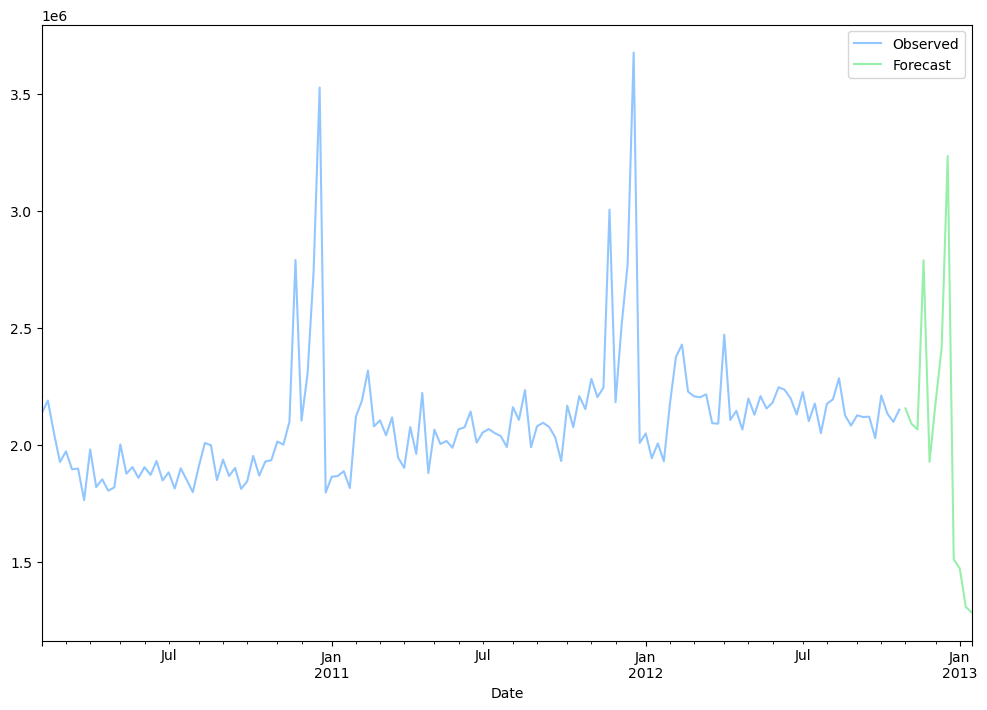

In [55]:
ax=y1.plot(label='Observed', figsize=(12,8))
pred_uc.predicted_mean.plot(ax=ax,label='Forecast')
plt.legend()
plt.show()

## Machine Learning

In [56]:
data.Type.unique()

array(['A', 'B', 'C'], dtype=object)

In [57]:
Type_dummies=pd.get_dummies(data.Type, prefix='Type')
data=pd.concat([data, Type_dummies],axis=1)
data

Store       Date  Weekly_Sales Type    Size  Temperature  Fuel_Price  \
0         1 2010-02-05    1643.69090    A  151315        42.31       2.572   
1         1 2010-02-12    1641.95744    A  151315        38.51       2.548   
2         1 2010-02-19    1611.96817    A  151315        39.93       2.514   
3         1 2010-02-26    1409.72759    A  151315        46.63       2.561   
4         1 2010-03-05    1554.80668    A  151315        46.50       2.625   
...     ...        ...           ...  ...     ...          ...         ...   
6430     45 2012-09-28     713.17395    B  118221        64.88       3.997   
6431     45 2012-10-05     733.45507    B  118221        64.89       3.985   
6432     45 2012-10-12     734.46436    B  118221        54.47       4.000   
6433     45 2012-10-19     718.12553    B  118221        56.47       3.969   
6434     45 2012-10-26     760.28143    B  118221        58.85       3.882   

      MarkDown1  MarkDown2  MarkDown3  ...         CPI  Unemployment  \
0       -500.00    -500.00    -500.00  ...  211.096358         8.106   
1       -500.00    -500.00    -500.00  ...  211.242170         8.106   
2       -500.00    -500.00    -500.00  ...  211.289143         8.106   
3       -500.00    -500.00    -500.00  ...  211.319643         8.106   
4       -500.00    -500.00    -500.00  ...  211.350143         8.106   
...         ...        ...        ...  ...         ...           ...   
6430    4556.61      20.64       1.50  ...  192.013558         8.684   
6431    5046.74    -500.00      18.82  ...  192.170412         8.667   
6432    1956.28    -500.00       7.89  ...  192.327265         8.667   
6433    2004.02    -500.00       3.18  ...  192.330854         8.667   
6434    4018.91      58.08     100.00  ...  192.308899         8.667   

      IsHoliday  Day  Month  Year Week  Type_A  Type_B  Type_C  
0             0    5    Feb  2010    5       1       0       0  
1             1   12    Feb  2010    6       1       0       0  
2             0   19    Feb  2010    7       1       0       0  
3             0   26    Feb  2010    8       1       0       0  
4             0    5    Mar  2010    9       1       0       0  
...         ...  ...    ...   ...  ...     ...     ...     ...  
6430          0   28    Sep  2012   39       0       1       0  
6431          0    5    Oct  2012   40       0       1       0  
6432          0   12    Oct  2012   41       0       1       0  
6433          0   19    Oct  2012   42       0       1       0  
6434          0   26    Oct  2012   43       0       1       0  

[6435 rows x 22 columns]

In [58]:
data_heatmap=data.copy()
data_heatmap.drop(['Store','Day','Month','Year','Date','Store','Type','Type_A','Type_B','Type_C'], axis=1, inplace=True)

In [59]:
def dataframe_heat(df):
    corr=df.corr()
    sns.heatmap(corr,annot=True, cmap='Pastel1_r')
    plt.figure(figsize=(20,8))
    plt.show()

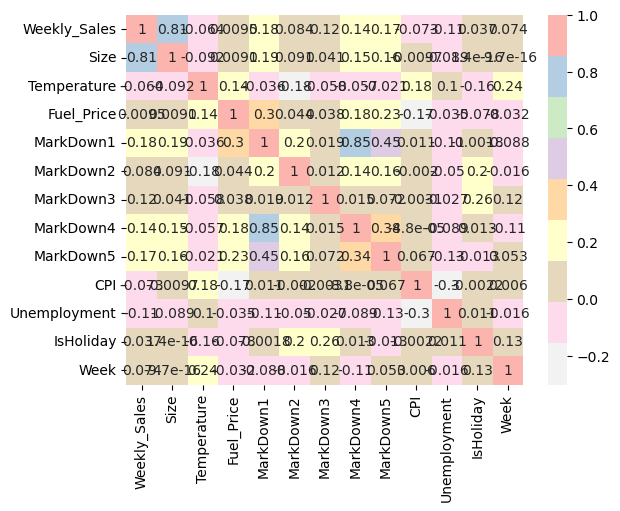

<Figure size 2000x800 with 0 Axes>

In [60]:
dataframe_heat(data_heatmap)

In [61]:
## Plotting Data

In [62]:
data.head()

Store       Date  Weekly_Sales Type    Size  Temperature  Fuel_Price  \
0      1 2010-02-05    1643.69090    A  151315        42.31       2.572   
1      1 2010-02-12    1641.95744    A  151315        38.51       2.548   
2      1 2010-02-19    1611.96817    A  151315        39.93       2.514   
3      1 2010-02-26    1409.72759    A  151315        46.63       2.561   
4      1 2010-03-05    1554.80668    A  151315        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  ...         CPI  Unemployment  IsHoliday  \
0     -500.0     -500.0     -500.0  ...  211.096358         8.106          0   
1     -500.0     -500.0     -500.0  ...  211.242170         8.106          1   
2     -500.0     -500.0     -500.0  ...  211.289143         8.106          0   
3     -500.0     -500.0     -500.0  ...  211.319643         8.106          0   
4     -500.0     -500.0     -500.0  ...  211.350143         8.106          0   

   Day  Month  Year Week  Type_A  Type_B  Type_C  
0    5    Feb  2010    5       1       0       0  
1   12    Feb  2010    6       1       0       0  
2   19    Feb  2010    7       1       0       0  
3   26    Feb  2010    8       1       0       0  
4    5    Mar  2010    9       1       0       0  

[5 rows x 22 columns]

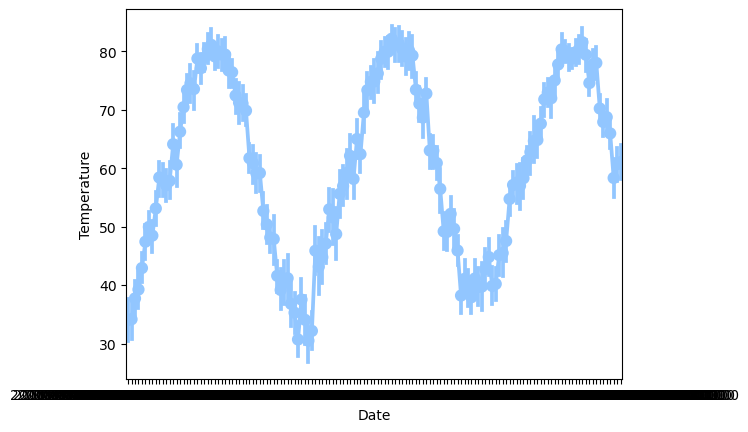

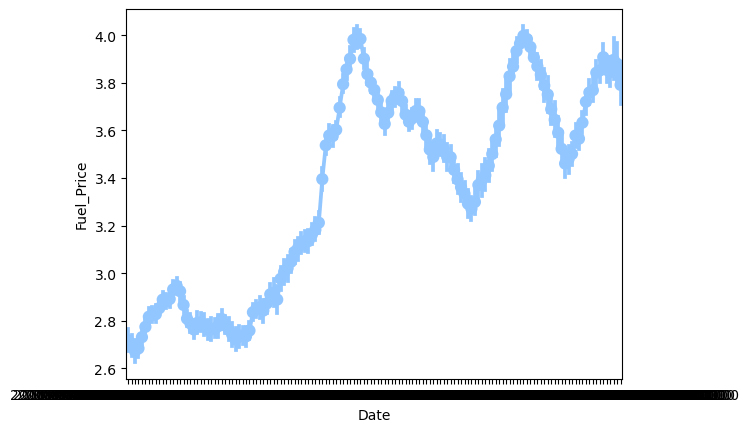

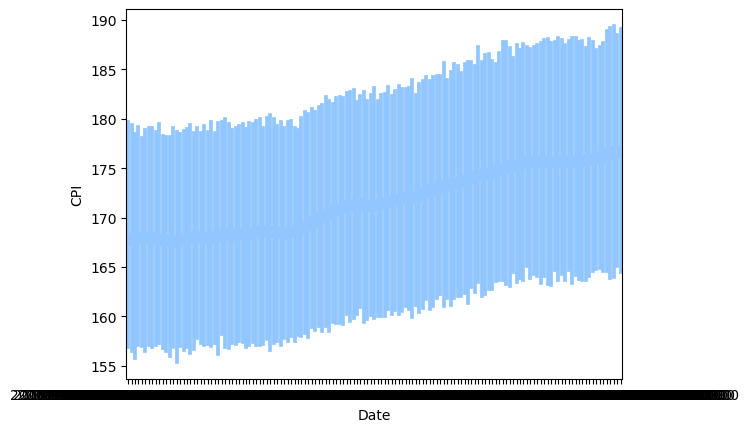

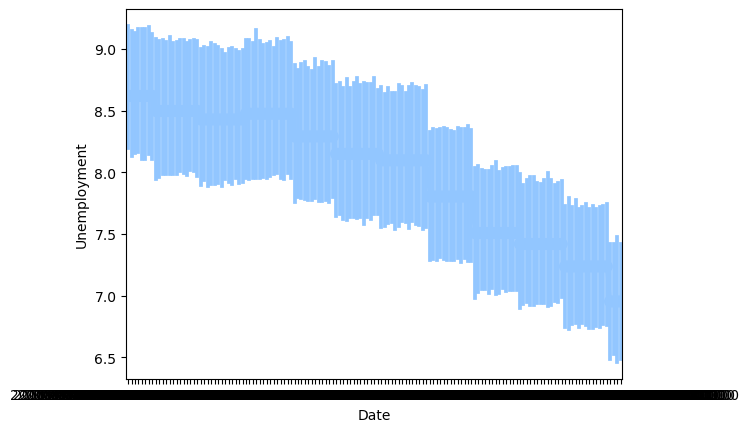

In [63]:
cols=["Temperature", "Fuel_Price","CPI","Unemployment"]
for a in cols:
    sns.pointplot(x='Date', y=a, data=data)
    plt.ylabel(a)
    plt.show()

## Feature Engineering

In [ ]:
data['Week']=round(floor())